In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
172701,2024-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,04 TO 06,146.0,Maisonette,1988,63 years 10 months,860000.0
172702,2024-02,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,63 years 05 months,820000.0
172703,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,62 years 11 months,795000.0
172704,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,62 years 10 months,935000.0


In [3]:
df = df.drop(["month","block","lease_commence_date","flat_model","street_name"],axis=1)


In [4]:
df.head(2)

,town,flat_type,storey_range,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,61 years 04 months,232000.0
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,60 years 07 months,250000.0


In [5]:
df = df.rename(columns={'flat_type':'number_of_rooms','storey_range':'storey'})

In [6]:
df['storey'] = df['storey'].str[-2:].astype('int')

In [7]:
df

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,12,44.0,61 years 04 months,232000.0
1,ANG MO KIO,3 ROOM,3,67.0,60 years 07 months,250000.0
2,ANG MO KIO,3 ROOM,3,67.0,62 years 05 months,262000.0
3,ANG MO KIO,3 ROOM,6,68.0,62 years 01 month,265000.0
4,ANG MO KIO,3 ROOM,3,67.0,62 years 05 months,265000.0
...,...,...,...,...,...,...
172701,YISHUN,EXECUTIVE,6,146.0,63 years 10 months,860000.0
172702,YISHUN,EXECUTIVE,6,142.0,63 years 05 months,820000.0
172703,YISHUN,EXECUTIVE,12,142.0,62 years 11 months,795000.0
172704,YISHUN,EXECUTIVE,9,146.0,62 years 10 months,935000.0


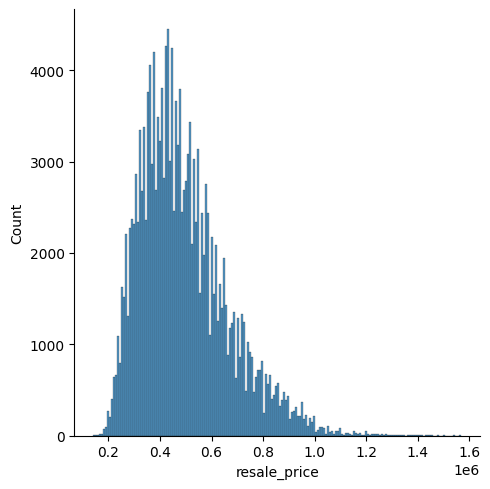

In [8]:
import seaborn as sns
sns.displot(df['resale_price'])

<Axes: >

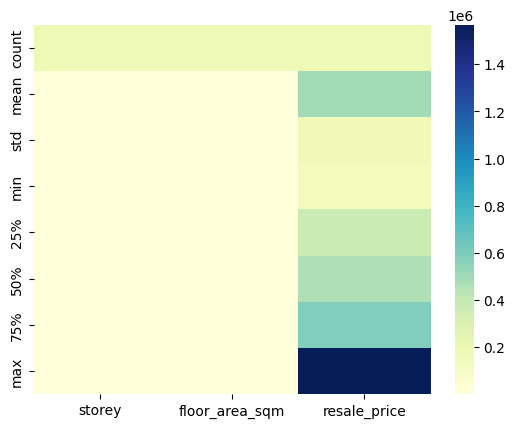

In [9]:
sns.heatmap(df.describe(), cmap="YlGnBu")

In [10]:
#df['remaining_lease'] = df['remaining_lease'].apply(lambda x: (float(x.split()[0]) + (float(x.split()[2])/12)) if (isinstance(x, str) and len(x.split()) == 4) else float(x) if isinstance(x, (int, float)) else np.nan)
df['remaining_lease'] = df['remaining_lease'].str.split(' ')
df['remaining_lease'] = df['remaining_lease'].apply(lambda x: (float(x[0]) + (float(x[2])/12)) if (isinstance(x, list) and len(x) == 4) else float(x[0]))
df.head()

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,12,44.0,61.333333,232000.0
1,ANG MO KIO,3 ROOM,3,67.0,60.583333,250000.0
2,ANG MO KIO,3 ROOM,3,67.0,62.416667,262000.0
3,ANG MO KIO,3 ROOM,6,68.0,62.083333,265000.0
4,ANG MO KIO,3 ROOM,3,67.0,62.416667,265000.0


In [11]:
df.head(2)

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,12,44.0,61.333333,232000.0
1,ANG MO KIO,3 ROOM,3,67.0,60.583333,250000.0


In [12]:
# Your modification code
remaining_lease = df['remaining_lease'].tolist()

remaining_lease_new = []
for i in remaining_lease:
    years = int(i)  # Extract the integer part (years)
    months = int((i - years) * 100)  # Extract the decimal part (months)

    if months >= 7:
        remaining_lease_new.append(years + 1)  # Increment years if months >= 7
    else:
        remaining_lease_new.append(years)

# Add the new modified list as a new column in the existing DataFrame
df['remaining_lease_new'] = remaining_lease_new
df

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price,remaining_lease_new
0,ANG MO KIO,2 ROOM,12,44.0,61.333333,232000.0,62
1,ANG MO KIO,3 ROOM,3,67.0,60.583333,250000.0,61
2,ANG MO KIO,3 ROOM,3,67.0,62.416667,262000.0,63
3,ANG MO KIO,3 ROOM,6,68.0,62.083333,265000.0,63
4,ANG MO KIO,3 ROOM,3,67.0,62.416667,265000.0,63
...,...,...,...,...,...,...,...
172701,YISHUN,EXECUTIVE,6,146.0,63.833333,860000.0,64
172702,YISHUN,EXECUTIVE,6,142.0,63.416667,820000.0,64
172703,YISHUN,EXECUTIVE,12,142.0,62.916667,795000.0,63
172704,YISHUN,EXECUTIVE,9,146.0,62.833333,935000.0,63


In [13]:
df

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price,remaining_lease_new
0,ANG MO KIO,2 ROOM,12,44.0,61.333333,232000.0,62
1,ANG MO KIO,3 ROOM,3,67.0,60.583333,250000.0,61
2,ANG MO KIO,3 ROOM,3,67.0,62.416667,262000.0,63
3,ANG MO KIO,3 ROOM,6,68.0,62.083333,265000.0,63
4,ANG MO KIO,3 ROOM,3,67.0,62.416667,265000.0,63
...,...,...,...,...,...,...,...
172701,YISHUN,EXECUTIVE,6,146.0,63.833333,860000.0,64
172702,YISHUN,EXECUTIVE,6,142.0,63.416667,820000.0,64
172703,YISHUN,EXECUTIVE,12,142.0,62.916667,795000.0,63
172704,YISHUN,EXECUTIVE,9,146.0,62.833333,935000.0,63


In [14]:
df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [15]:
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'EXECUTIVE','6 ROOM',regex=True)
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'MULTI-GENERATION','5 ROOM',regex=True)
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'ROOM','',regex=True).astype('int')

In [16]:
df = df.replace(dict.fromkeys(['SEMBAWANG','SENGKANG','WOODLANDS','YISHUN'], 'NORTH'))
df = df.replace(dict.fromkeys(['BUKIT MERAH','BUKIT TIMAH','QUEENSTOWN'], 'SOUTH'))
df = df.replace(dict.fromkeys(['BEDOK','GEYLANG','HOUGANG','KALLANG/WHAMPOA','PASIR RIS','PUNGGOL','SERANGOON','TAMPINES'], 'EAST'))
df = df.replace(dict.fromkeys(['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST'], 'WEST'))
df = df.replace(dict.fromkeys(['ANG MO KIO','CENTRAL AREA','BISHAN','MARINE PARADE','TOA PAYOH'], 'CENTRAL'))

In [17]:
df['town'].unique()

array(['CENTRAL', 'EAST', 'WEST', 'SOUTH', 'NORTH'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and "town" is the column you want to label encode
# df = ...

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the "town" column
df["town_encoded"] = label_encoder.fit_transform(df["town"])

# Now df["town_encoded"] contains the encoded values


In [19]:
df.dtypes

town                    object
number_of_rooms          int32
storey                   int32
floor_area_sqm         float64
remaining_lease        float64
resale_price           float64
remaining_lease_new      int64
town_encoded             int32
dtype: object

In [20]:
df

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price,remaining_lease_new,town_encoded
0,CENTRAL,2,12,44.0,61.333333,232000.0,62,0
1,CENTRAL,3,3,67.0,60.583333,250000.0,61,0
2,CENTRAL,3,3,67.0,62.416667,262000.0,63,0
3,CENTRAL,3,6,68.0,62.083333,265000.0,63,0
4,CENTRAL,3,3,67.0,62.416667,265000.0,63,0
...,...,...,...,...,...,...,...,...
172701,NORTH,6,6,146.0,63.833333,860000.0,64,2
172702,NORTH,6,6,142.0,63.416667,820000.0,64,2
172703,NORTH,6,12,142.0,62.916667,795000.0,63,2
172704,NORTH,6,9,146.0,62.833333,935000.0,63,2


In [22]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['number_of_rooms', 'storey', 'floor_area_sqm', 'remaining_lease',
       'resale_price', 'remaining_lease_new', 'town_encoded'],
      dtype='object')

In [23]:
correaltion = numeric_features.corr()
print(correaltion["resale_price"].sort_values(ascending=False),'\n')

resale_price           1.000000
number_of_rooms        0.614283
floor_area_sqm         0.602579
storey                 0.359019
remaining_lease        0.325779
remaining_lease_new    0.325628
town_encoded          -0.085804
Name: resale_price, dtype: float64 



<Axes: title={'center': 'correlation'}>

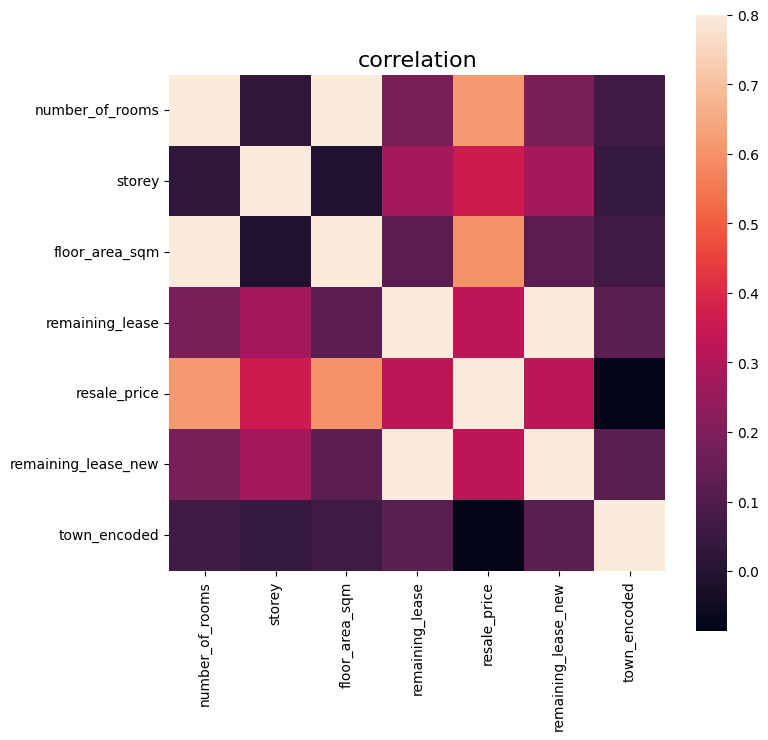

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(8, 8))
plt.title("correlation", y=1, size=16)
sns.heatmap(correaltion, square=True, vmax=0.8)


In [21]:
cdc

NameError: name 'cdc' is not defined

# Target Encoding

In [34]:
def Square_Root_Transformation(df, *column):

    for col_name in column:
        # Square Root Tansformation
        df[col_name+'_sqrt'] = np.sqrt(df[col_name])
        

    column =[i for i in df.columns if 'sqrt' in i]

    return (df, * column)

In [35]:
Square_Root_Transformation(df,"floor_area_sqm")
Square_Root_Transformation(df,"resale_price")

(           town  number_of_rooms  storey  floor_area_sqm  remaining_lease  \
 0       CENTRAL                2      12            44.0        61.333333   
 1       CENTRAL                3       3            67.0        60.583333   
 2       CENTRAL                3       3            67.0        62.416667   
 3       CENTRAL                3       6            68.0        62.083333   
 4       CENTRAL                3       3            67.0        62.416667   
 ...         ...              ...     ...             ...              ...   
 172701    NORTH                6       6           146.0        63.833333   
 172702    NORTH                6       6           142.0        63.416667   
 172703    NORTH                6      12           142.0        62.916667   
 172704    NORTH                6       9           146.0        62.833333   
 172705    NORTH                5       6           164.0        62.916667   
 
         resale_price  remaining_lease_new  town_encoded  floo

In [36]:
df

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price,remaining_lease_new,town_encoded,floor_area_sqm_sqrt,resale_price_sqrt
0,CENTRAL,2,12,44.0,61.333333,232000.0,62,0,6.633250,481.663783
1,CENTRAL,3,3,67.0,60.583333,250000.0,61,0,8.185353,500.000000
2,CENTRAL,3,3,67.0,62.416667,262000.0,63,0,8.185353,511.859356
3,CENTRAL,3,6,68.0,62.083333,265000.0,63,0,8.246211,514.781507
4,CENTRAL,3,3,67.0,62.416667,265000.0,63,0,8.185353,514.781507
...,...,...,...,...,...,...,...,...,...,...
172701,NORTH,6,6,146.0,63.833333,860000.0,64,2,12.083046,927.361850
172702,NORTH,6,6,142.0,63.416667,820000.0,64,2,11.916375,905.538514
172703,NORTH,6,12,142.0,62.916667,795000.0,63,2,11.916375,891.627725
172704,NORTH,6,9,146.0,62.833333,935000.0,63,2,12.083046,966.953980


In [37]:
df

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price,remaining_lease_new,town_encoded,floor_area_sqm_sqrt,resale_price_sqrt
0,CENTRAL,2,12,44.0,61.333333,232000.0,62,0,6.633250,481.663783
1,CENTRAL,3,3,67.0,60.583333,250000.0,61,0,8.185353,500.000000
2,CENTRAL,3,3,67.0,62.416667,262000.0,63,0,8.185353,511.859356
3,CENTRAL,3,6,68.0,62.083333,265000.0,63,0,8.246211,514.781507
4,CENTRAL,3,3,67.0,62.416667,265000.0,63,0,8.185353,514.781507
...,...,...,...,...,...,...,...,...,...,...
172701,NORTH,6,6,146.0,63.833333,860000.0,64,2,12.083046,927.361850
172702,NORTH,6,6,142.0,63.416667,820000.0,64,2,11.916375,905.538514
172703,NORTH,6,12,142.0,62.916667,795000.0,63,2,11.916375,891.627725
172704,NORTH,6,9,146.0,62.833333,935000.0,63,2,12.083046,966.953980


In [38]:
df = df.drop("remaining_lease",axis=1)
df = df.drop("town",axis=1)
df = df.drop("floor_area_sqm",axis=1)
df = df.drop("resale_price",axis=1)


In [39]:
df.describe()

,number_of_rooms,storey,remaining_lease_new,town_encoded,floor_area_sqm_sqrt,resale_price_sqrt
count,172706.000000,172706.000000,172706.000000,172706.000000,172706.000000,172706.000000
mean,4.127963,9.767206,75.124593,1.966874,9.784671,692.231339
std,0.917045,5.946249,13.883477,1.323391,1.228863,117.556614
min,1.000000,3.000000,42.000000,0.000000,5.567764,374.165739
25%,3.000000,6.000000,64.000000,1.000000,9.055385,606.630036
50%,4.000000,9.000000,75.000000,2.000000,9.643651,679.705819
75%,5.000000,12.000000,89.000000,3.000000,10.583005,764.852927
max,6.000000,51.000000,98.000000,4.000000,15.779734,1252.552594


In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import math

X = df.drop(["resale_price_sqrt"],axis=1)
y = df['resale_price_sqrt']

x_train,x_test,y_train,y_test = train_test_split(X,y)

model = LinearRegression()
model.fit(x_train,y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f"Train_Mean_squared_error: {math.sqrt(mean_squared_error(y_train,y_train_pred))}")
print(f"Test_Mean_squared_error: {math.sqrt(mean_squared_error(y_test,y_test_pred))}")

print(f"Train R squared Value: {r2_score(y_train,y_train_pred)}")
print(f"Test R squared Value: {r2_score(y_test,y_test_pred)}")



Train_Mean_squared_error: 76.30495668181372
Test_Mean_squared_error: 76.12120105996803
Train R squared Value: 0.5789744676759214
Test R squared Value: 0.5798133429392369


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [42]:
    #x = df.drop(columns=["resale_price"])
    #y = df["resale_price"]

In [43]:
# FInd the best algorithm for the delivery date prediction 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def regression_models(df,algorithm):


    x = df.drop(["resale_price_sqrt"],axis=1)
    y = df['resale_price_sqrt']
    #train & Test splitting

    x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
    model= algorithm().fit(x_train,y_train)
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)    


    #Checking the accuracy score
    mse_train = mean_squared_error(y_train,y_train_pred)
    mse_test = mean_squared_error(y_test,y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    

    mae_train = mean_absolute_error(y_train,y_train_pred)
    mae_test = mean_absolute_error(y_test,y_test_pred)
    
    r2_train = r2_score(y_train,y_train_pred)
    r2_test = r2_score(y_test,y_test_pred)
    

    metrics =   {
               "R2_score_train":r2_train,
               "R2_score_test":r2_test,
               "Mean_squared_error_train":mse_train,
               "Mean_squared_error_test":mse_test,
               "Root_mean_squared_error_train":rmse_train,
               "Root_mean_squared_error_test":rmse_test,
               "Mean_absolute_error_train": mae_train,
               "Mean_absolute_error_test": mae_test}
    return metrics

In [44]:
print(regression_models(df,DecisionTreeRegressor))
print(regression_models(df,RandomForestRegressor))
print(regression_models(df,ExtraTreesRegressor))
print(regression_models(df,GradientBoostingRegressor))
print(regression_models(df,AdaBoostRegressor))
print(regression_models(df,XGBRegressor))

{'R2_score_train': 0.8856240388988647, 'R2_score_test': 0.8072617835147692, 'Mean_squared_error_train': 1582.3862679620374, 'Mean_squared_error_test': 2651.595972213564, 'Root_mean_squared_error_train': 39.77921904665849, 'Root_mean_squared_error_test': 51.493649824163406, 'Mean_absolute_error_train': 27.415577802149077, 'Mean_absolute_error_test': 37.23619026980558}
{'R2_score_train': 0.8823437946357954, 'R2_score_test': 0.8267585553727568, 'Mean_squared_error_train': 1627.7682995311736, 'Mean_squared_error_test': 2383.3691375330204, 'Root_mean_squared_error_train': 40.34561066003554, 'Root_mean_squared_error_test': 48.819761752112434, 'Mean_absolute_error_train': 29.03055873315417, 'Mean_absolute_error_test': 35.79694017454291}
{'R2_score_train': 0.8856240360823008, 'R2_score_test': 0.8189878666599655, 'Mean_squared_error_train': 1582.386306929071, 'Mean_squared_error_test': 2490.2743858429303, 'Root_mean_squared_error_train': 39.77921953644982, 'Root_mean_squared_error_test': 49.902

In [45]:
# XGBRegressor 

model = XGBRegressor()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
data ={
        'Train_Mean_Square_Error': round(mean_squared_error(y_train, y_train_pred),4),
        'Test_Mean_Square_Error': round(mean_squared_error(y_test, y_test_pred),4)}
print(data)

{'Train_Mean_Square_Error': 2261.7297, 'Test_Mean_Square_Error': 2365.8183}


In [46]:
# Hyperparameter tuning for XGBRegressor

# Define the parameter grid
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]
}

# Create the XGBRegressor

xgb_reg = XGBRegressor()

# Use GridSearchCV to perform the search

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(x_train, y_train)

# Get the best parameters and the best model

best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set

y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
best_params

Mean Squared Error on Test Set: 2591.076460712776


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [47]:
# XBGRegressore with Hyperparameter

xgb_model = XGBRegressor(learning_rate = 0.2, max_depth = 5, n_estimators = 200)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score ={'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse}
print(score)

{'R2': 0.8231424369910896, 'Mean Absolute Error': 38.08014295501656, 'Mean Squared Error': 2438.8924159447547, 'Root Mean Squared Error': 49.385143676461595}


In [48]:
# DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
data ={
        'Train_Mean_Square_Error': round(mean_squared_error(y_train, y_train_pred),4),
        'Test_Mean_Square_Error': round(mean_squared_error(y_test, y_test_pred),4)}
print(data)

{'Train_Mean_Square_Error': 1567.4957, 'Test_Mean_Square_Error': 2720.7237}


In [49]:
# Hyperparameter tuning

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Use GridSearchCV to perform the search
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
print(best_model, best_params)

Mean Squared Error on Test Set: 2520.8555717926665
DecisionTreeRegressor(max_depth=15, min_samples_split=10, random_state=42) {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [52]:
# DecisionTreeRegressor with Hyperparameter
from sklearn import tree
decision_tree_model = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10,)
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score ={'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse}
print(score)

{'R2': 0.8191206649422664, 'Mean Absolute Error': 36.91973728133818, 'Mean Squared Error': 2494.3532578881627, 'Root Mean Squared Error': 49.943500657124176}


In [ ]:
sdxsa

In [ ]:
df

,number_of_rooms,storey,remaining_lease_new,town_encoded,floor_area_sqm_sqrt,resale_price_sqrt
0,2,12,62,0,6.633250,481.663783
1,3,3,61,0,8.185353,500.000000
2,3,3,63,0,8.185353,511.859356
3,3,6,63,0,8.246211,514.781507
4,3,3,63,0,8.185353,514.781507
...,...,...,...,...,...,...
172701,6,6,64,2,12.083046,927.361850
172702,6,6,64,2,11.916375,905.538514
172703,6,12,63,2,11.916375,891.627725
172704,6,9,63,2,12.083046,966.953980


In [ ]:
df.to_csv("Final_df.csv")

In [ ]:
# Resale Price Prediction

data = np.array([[5,6,63,2,12.806]])
data.shape
print('XGBRegressor -> Resale Price : $', xgb_model.predict(data)[0]**2)
print('DecisionTreeRegressor -> Resale Price : $', decision_tree_model.predict(data)[0]**2)

XGBRegressor -> Resale Price : $ 818188.8176597692
DecisionTreeRegressor -> Resale Price : $ 906424.5185532487


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Resale Price Prediction (481.663783/)

data = np.array([[2,12, 44.0,62,0,6.6332,]])
data.shape
print('XGBRegressor -> Resale Price : $', xgb_model.predict(data)[0]**2)
print('DecisionTreeRegressor -> Resale Price : $', decision_tree_model.predict(data)[0]**2)

XGBRegressor -> Resale Price : $ 271773.7227471024
DecisionTreeRegressor -> Resale Price : $ 238098.27127817398


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
ata = np.array([[5,6,63,2,12.80]])
data.shape
print('XGBRegressor -> Resale Price : $', xgb_model.predict(data)[0]**2)
print('DecisionTreeRegressor -> Resale Price : $', decision_tree_model.predict(data)[0]**2)

XGBRegressor -> Resale Price : $ 818188.8176597692
DecisionTreeRegressor -> Resale Price : $ 906424.5185532487


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

pickle.dump(decision_tree_model, open("Predicted_model.pkl","wb"))